# Outliers Analysis

> * **Author :** Gabriele Accarino
> * **Contact :** gabriele.accarino@unisalento.it

In [70]:
import numpy as np

import matplotlib.pyplot as plt 
import operator
from matplotlib.pyplot import figure

import pandas as pd  
import seaborn as sns 

%matplotlib inline

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import time
import math

boston_dataset = load_boston()

In [4]:
print(boston_dataset.keys())
print(type(boston_dataset))

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
<class 'sklearn.utils.Bunch'>


* **data** : contains the information for various houses
* **target** : prices of the house
* **feature_names** : names of the features
* **DESCR** : describes the dataset

## Dataset

In [5]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Features labels

In [6]:
features = boston_dataset.feature_names
print(features)
print(len(features))

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
13


### Target values

In [7]:
target = boston_dataset.target
target_name = 'MEDV'
print(target)
print('\n')
print("The Target name is : {}".format(target_name))

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

### Create the Pandas Dataframe

In [8]:
boston = pd.DataFrame(boston_dataset.data, columns = features)
print(boston.shape)

(506, 13)


In [9]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Add the target variable to the Dataframe

In [10]:
boston[target_name] = boston_dataset.target

In [11]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Check for NaN values

In [12]:
print(boston.isnull().sum())
print("")
print(boston.isna().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


# Outliers Analysis (new!)

From : https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dbaZ
* In statistics, an **outlier** is an observation point that is **distant from other observations**
* The outliers can be a result of a **mistake during data collection** or it can be just an **indication of variance** in your data
* If they are the result of a mistake, then we can ignore them, but if it is just a variance in the data we would **need think a bit further**
* Before we try to understand whether to ignore the outliers or not, **we need to know the ways to identify them**
* **Univariate** (one variable outlier analysis) and **Multivariate** (two or more variable outlier analysis)

## Create a univariate DataFrame with the input variable and the target 

In [13]:
input_feature = 'RM'
output_feature = 'MEDV'

In [14]:
X_tmp = pd.DataFrame()

X_tmp[input_feature] = boston[input_feature]
X_tmp[output_feature] = boston[output_feature]

In [15]:
X_tmp

,RM,MEDV
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2
...,...,...
501,6.593,22.4
502,6.120,20.6
503,6.976,23.9
504,6.794,22.0


### Box Plot

* A **box plot** is a method for graphically depicting groups of numerical data through their quartiles
* Box plots may also have lines extending vertically from the boxes (**whiskers**) indicating variability outside the upper and lower quartiles
* Outliers may be plotted as **individual points**

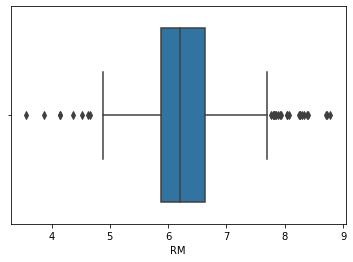

In [16]:
#sns.boxplot(x=X_tmp[input_feature])
sns.boxplot(x=boston[input_feature])

### The Box-plot Anathomy

<img src="img/box_plot.png"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />

### Quartiles (Order Statistics)

* A **quartile** divides the number of data points into **four more or less equal parts**, or quarters
* The **first quartile (Q1)** is defined as the **middle value between the smallest number and the median of the data set**, it is also known as the lower quartile or the 25th empirical quartile and it marks where 25% of the data is below or to the left of it
* The **second quartile (Q2)** is the **median** of a data set and 50% of the data lies below this point
* The **third quartile (Q3)** is the **middle value between the median and the highest value of the data set**, it is also known as the upper quartile or the 75th empirical quartile and 75% of the data lies below this point

#### Quantiles summary

| <center>Symbol | <center>Names | <center>Definition |
| --- | --- | --- |
| $Q_1$ | first quartile, lower quartile, $25th$ percentile | splits off the lowest $25%$ of data from the highest $75%$ |
| $Q_2$ | second quartile, median, $50th$ percentile | cuts data set in half |
| $Q_3$ | third quartile, upper quartile, $75th$ percentile | splits off the highest $25%$ of data from the lowest $75%$ |

# Interquartile range (IQR-score)

* Box plot use the **IQR** method to display data and outliers
* Is a measure of statistical dispersion, being equal to the **difference between 75th and 25th percentiles**, or **between upper and lower quartiles**

$$\large IQR = Q_3 - Q_1$$

$$\large x < (Q1 - 1.5 * IQR)$$

$$\large x > (Q3 + 1.5 * IQR)$$

In [17]:
#Q1 = X_tmp.quantile(0.25)
#Q2 = X_tmp.quantile(0.5) # == boston.median()
#Q3 = X_tmp.quantile(0.75)

Q1 = boston.quantile(0.25)
Q2 = boston.quantile(0.5)
Q3 = boston.quantile(0.75)

#interquartile distance
IQR = Q3 - Q1

print("First Quartile (Q1)")
print(Q1)
print("")
print("Second Quartile (Q2) or Median")
print(Q2)
print("")
print("Third Quartile (Q3)")
print(Q3)
#print(IQR)

First Quartile (Q1)
CRIM         0.082045
ZN           0.000000
INDUS        5.190000
CHAS         0.000000
NOX          0.449000
RM           5.885500
AGE         45.025000
DIS          2.100175
RAD          4.000000
TAX        279.000000
PTRATIO     17.400000
B          375.377500
LSTAT        6.950000
MEDV        17.025000
Name: 0.25, dtype: float64

Second Quartile (Q2) or Median
CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
MEDV        21.20000
Name: 0.5, dtype: float64

Third Quartile (Q3)
CRIM         3.677083
ZN          12.500000
INDUS       18.100000
CHAS         0.000000
NOX          0.624000
RM           6.623500
AGE         94.075000
DIS          5.188425
RAD         24.000000
TAX        666.000000
PTRATIO     20.200000
B          396.225000
LSTAT   

In [18]:
#boston_q1 = X_tmp[~(X_tmp < (Q1 - 1.5 * IQR))]
boston_q1 = boston[~(boston < (Q1 - 1.5 * IQR))][input_feature]
print("Detect samples below the lower threshold : {}".format(boston_q1.isnull().sum()))

#boston_q3 = X_tmp[~(X_tmp > (Q3 + 1.5 * IQR))]
boston_q3 = boston[~(boston > (Q3 + 1.5 * IQR))][input_feature]
print("Detect samples above the upper threshold : {}".format(boston_q3.isnull().sum()))

Detect samples below the lower threshold : 8
Detect samples above the upper threshold : 22


In [19]:
# filters out anomalies 
#boston_iqr = X_tmp[~((X_tmp < (Q1 - 1.5 * IQR)) | (X_tmp > (Q3 + 1.5 * IQR))).any(axis=1)]
boston_iqr = boston[~((boston < (Q1 - 1.5 * IQR)) | (boston > (Q3 + 1.5 * IQR)))[input_feature]]
print("Number of inliers (IQR method) : {}".format(boston_iqr.shape[0]))

# save outliers
#outliers_iqr = X_tmp[((X_tmp < (Q1 - 1.5 * IQR)) | (X_tmp > (Q3 + 1.5 * IQR))).any(axis=1)]
outliers_iqr = boston[((boston < (Q1 - 1.5 * IQR)) | (boston > (Q3 + 1.5 * IQR)))[input_feature]] #.any(axis=1)]
print("Number of outliers (IQR method) : {}".format(outliers_iqr.shape[0]))

Number of inliers (IQR method) : 476
Number of outliers (IQR method) : 30


## Scatter Plot RM Vs MEDV: Inliers & Outliers

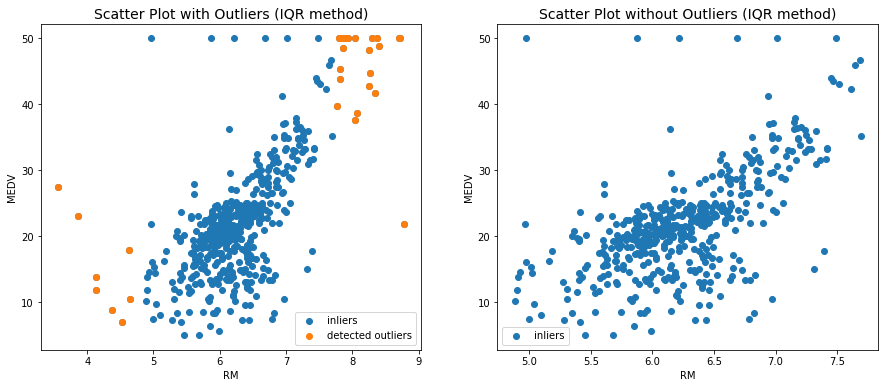

In [20]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(boston[input_feature], boston[output_feature], label = 'inliers')
ax1.scatter(outliers_iqr[input_feature], outliers_iqr[output_feature], label = 'detected outliers')
ax1.set_xlabel(input_feature)
ax1.set_ylabel(output_feature)
ax1.set_title('Scatter Plot with Outliers (IQR method)', fontsize = 14)
ax1.legend()

ax2.scatter(boston_iqr[input_feature], boston_iqr[output_feature], label = 'inliers')
ax2.set_xlabel(input_feature)
ax2.set_ylabel(output_feature)
ax2.set_title('Scatter Plot without Outliers (IQR method)', fontsize = 14)
ax2.legend()

plt.show()

# Z-score (Feature Scaling)

* The **Z-score** is the **signed number of standard deviations** by which **the value of an observation or data point is above the mean value** of what is being observed or measured
* Z-score is finding the distribution of data where **mean is 0** and **standard deviation is 1** i.e. **normal distribution**
* While calculating the Z-score we re-scale and center the data and look for data points which are too far from zero
* In most of the cases a **threshold of 3 or -3 is used**
* The Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers

$$\large Z = \frac{X - \mu}{\sigma}$$

In [21]:
from scipy import stats

#boston_Z = X_tmp[(np.abs(stats.zscore(X_tmp)) < 3).all(axis=1)]
boston_Z = boston[(np.abs(stats.zscore(boston[input_feature])) < 3)]
print("Number of inliers (Z-score method) : {}".format(boston_Z.shape[0]))

#outliers_Z = X_tmp[~(np.abs(stats.zscore(X_tmp)) < 3).all(axis=1)]
outliers_Z = boston[~(np.abs(stats.zscore(boston[input_feature])) < 3)]
print("Number of outliers (Z-score method) : {}".format(outliers_Z.shape[0]))

Number of inliers (Z-score method) : 498
Number of outliers (Z-score method) : 8


## Scatter Plot with and without Outliers (Z-score method)

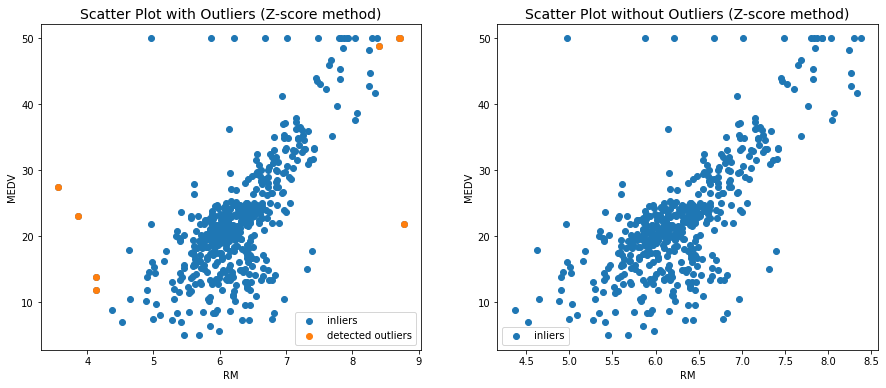

In [22]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(boston[input_feature], boston[target_name], label = 'inliers')
ax1.scatter(outliers_Z[input_feature], outliers_Z[target_name], label = 'detected outliers')
ax1.set_xlabel(input_feature)
ax1.set_ylabel(target_name)
ax1.set_title('Scatter Plot with Outliers (Z-score method)', fontsize = 14)
ax1.legend()

ax2.scatter(boston_Z[input_feature], boston_Z[target_name], label = 'inliers')
ax2.set_xlabel(input_feature)
ax2.set_ylabel(target_name)
ax2.set_title('Scatter Plot without Outliers (Z-score method)', fontsize = 14)
ax2.legend()

plt.show()

# Plot the 'Pearson' Correlation Matrix of the Boston dataset

$$\large \rho_{X,Y} = \frac{\sum_{i} (x_{i} - \mu_{X})(y_{i}-\mu_{Y})}{\sqrt{\sum_{j}(x_{j}-\mu_{X})^2 \sum_{k} (y_{k}-\mu_{Y})^2}}$$

$$\large -1 \le \rho_{X,Y} \le 1$$

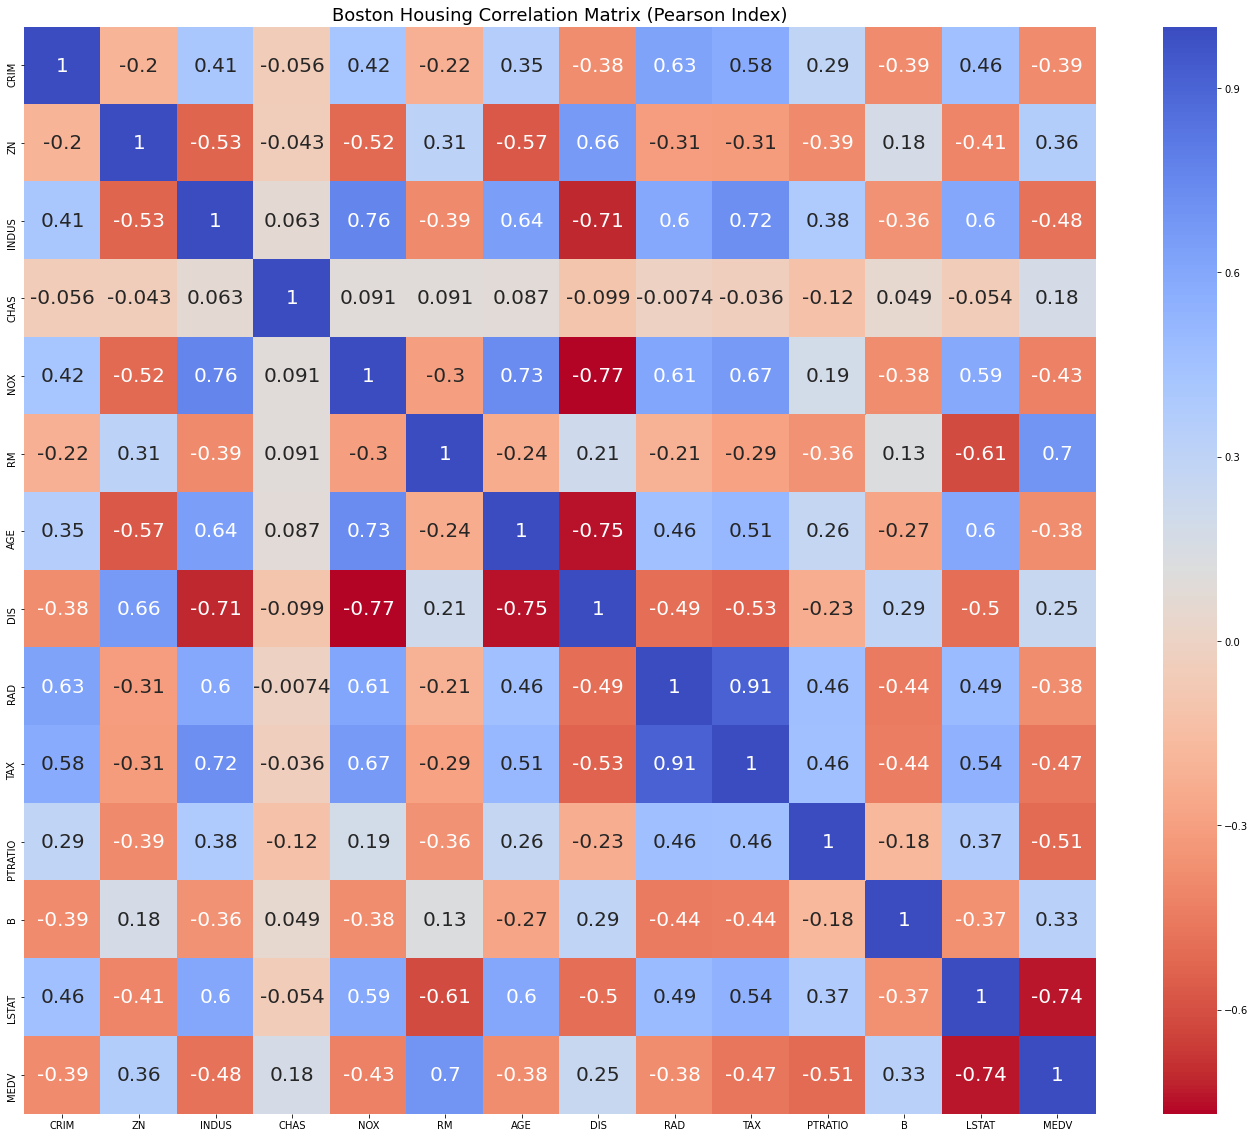

In [23]:
f, (ax1) = plt.subplots(1, 1, figsize=(24,20))
correlation_matrix = boston.corr(method='pearson')
sns.heatmap(correlation_matrix, cmap='coolwarm_r', annot = True, annot_kws={'size':20}, ax=ax1)
ax1.set_title("Boston Housing Correlation Matrix (Pearson Index)", fontsize=18)
plt.show()

By looking at the correlation matrix we can see that:
* **MEDV** has a strong positive correlation with **RM (0.7)** 
* **MEDV** has a strong negative correlation with **LSTAT (-0.74)**

**Important**: An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model. Same goes for the features DIS and AGE which have a correlation of -0.75.


# Scatter Plot of LSTAT and RM

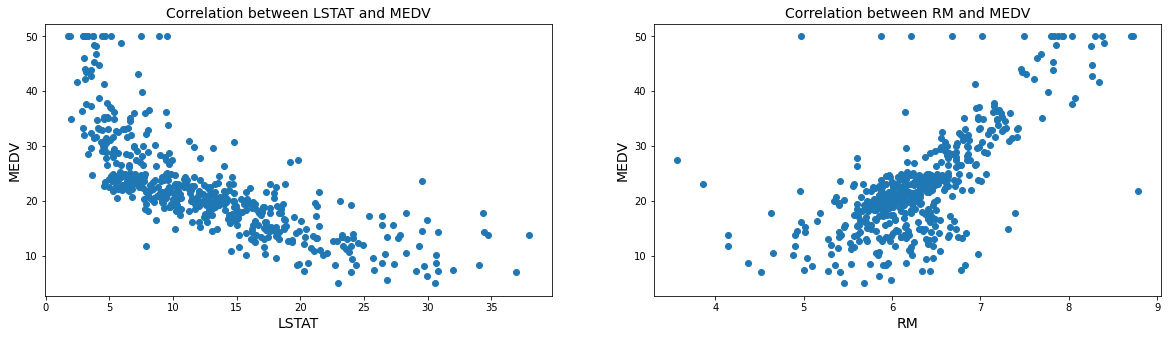

In [24]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']

for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title("Correlation between {} and {}".format(col, target_name), fontsize = 14)
    plt.xlabel(col, fontsize = 14)
    plt.ylabel('MEDV', fontsize = 14)

# Further Outliers Analysis & Techniques

## Outliers Detection and Removal (only RM feature is considered)

* **Thresholds** of **3** and **2.9** are considered for the Z-score method

In [25]:
input_feature = 'RM'
output_feature = 'MEDV'

In [29]:
# Only RM feature
X_1 = pd.DataFrame(boston[input_feature], columns = [input_feature])

print(X_1.shape)

(506, 1)


In [30]:
X_1.head()

,RM
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147


In [31]:
from scipy import stats

# X without outliers
X_in_3 = X_1[(np.abs(stats.zscore(X_1)) < 3).all(axis=1)]
print("Number of inliers (Z-score method); threshold ({}) : {}".format(3, X_in_3.shape[0]))

X_out_3 = X_1[~(np.abs(stats.zscore(X_1)) < 3).all(axis=1)]
print("Number of outliers (Z-score method); threshold ({}) : {}".format(3, X_out_3.shape[0]))

X_in_2_9 = X_1[(np.abs(stats.zscore(X_1)) < 2.9).all(axis=1)]
print("Number of inliers (Z-score method); threshold ({}) : {}".format(2.9, X_in_2_9.shape[0]))

X_out_2_9 = X_1[~(np.abs(stats.zscore(X_1)) < 2.9).all(axis=1)]
print("Number of outliers (Z-score method); threshold ({}) : {}".format(2.9, X_out_2_9.shape[0]))

Number of inliers (Z-score method); threshold (3) : 498
Number of outliers (Z-score method); threshold (3) : 8
Number of inliers (Z-score method); threshold (2.9) : 496
Number of outliers (Z-score method); threshold (2.9) : 10


In [32]:
y_in_3 = target[X_in_3.index]
y_out_3 = target[X_out_3.index]
y_in_2_9 = target[X_in_2_9.index]
y_out_2_9 = target[X_out_2_9.index]

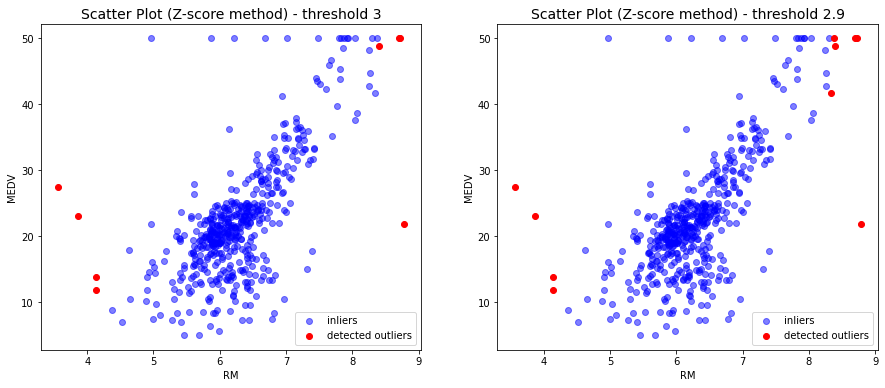

In [33]:
fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
# for single feature
ax1.scatter(X_in_3, y_in_3, label = 'inliers', c = 'blue', alpha = 0.5)
ax1.scatter(X_out_3, y_out_3, label = 'detected outliers', c = 'r')

ax1.set_xlabel(input_feature)
ax1.set_ylabel(output_feature)
ax1.set_title('Scatter Plot (Z-score method) - threshold 3', fontsize = 14)
ax1.legend()

ax2 = fig.add_subplot(122)
# for single feature
ax2.scatter(X_in_2_9, y_in_2_9, label = 'inliers', c = 'blue', alpha = 0.5)
ax2.scatter(X_out_2_9, y_out_2_9, label = 'detected outliers', c = 'r')

ax2.set_xlabel(input_feature)
ax2.set_ylabel(output_feature)
ax2.set_title('Scatter Plot (Z-score method) - threshold 2.9', fontsize = 14)
ax2.legend()

plt.show()

## Outliers Detection and Removal (the RM feature is considered along with the target MEDV)

* **Thresholds** of **3** and **2.9** are considered for the Z-score method

In [36]:
# RM feature along with the target (MEDV)
X_2 = pd.DataFrame(np.c_[boston[input_feature], target], columns = [input_feature, output_feature])

print(X_2.shape)

(506, 2)


In [37]:
X_2.head()

,RM,MEDV
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


In [38]:
from scipy import stats

# X without outliers
X_in_3 = X_2[(np.abs(stats.zscore(X_2)) < 3).all(axis=1)]
print("Number of inliers (Z-score method); threshold ({}) : {}".format(3, X_in_3.shape[0]))

X_out_3 = X_2[~(np.abs(stats.zscore(X_2)) < 3).all(axis=1)]
print("Number of outliers (Z-score method); threshold ({}) : {}".format(3, X_out_3.shape[0]))

X_in_2_9 = X_2[(np.abs(stats.zscore(X_2)) < 2.9).all(axis=1)]
print("Number of inliers (Z-score method); threshold ({}) : {}".format(2.9, X_in_2_9.shape[0]))

X_out_2_9 = X_2[~(np.abs(stats.zscore(X_2)) < 2.9).all(axis=1)]
print("Number of outliers (Z-score method); threshold ({}) : {}".format(2.9, X_out_2_9.shape[0]))

Number of inliers (Z-score method); threshold (3) : 498
Number of outliers (Z-score method); threshold (3) : 8
Number of inliers (Z-score method); threshold (2.9) : 483
Number of outliers (Z-score method); threshold (2.9) : 23


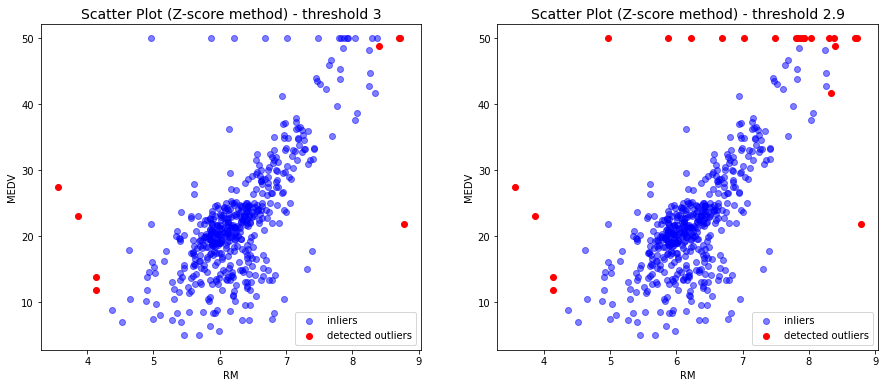

In [39]:
fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)

# for both feature and target
ax1.scatter(X_in_3[input_feature], X_in_3[output_feature], label = 'inliers', c = 'blue', alpha = 0.5)
ax1.scatter(X_out_3[input_feature], X_out_3[output_feature], label = 'detected outliers', c = 'r')

ax1.set_xlabel(input_feature)
ax1.set_ylabel(output_feature)
ax1.set_title('Scatter Plot (Z-score method) - threshold 3', fontsize = 14)
ax1.legend()

ax2 = fig.add_subplot(122)

# for both feature and target
ax2.scatter(X_in_2_9[input_feature], X_in_2_9[output_feature], label = 'inliers', c = 'blue', alpha = 0.5)
ax2.scatter(X_out_2_9[input_feature], X_out_2_9[output_feature], label = 'detected outliers', c = 'r')

ax2.set_xlabel(input_feature)
ax2.set_ylabel(output_feature)
ax2.set_title('Scatter Plot (Z-score method) - threshold 2.9', fontsize = 14)
ax2.legend()

plt.show()

# Point-to-line Distance and Z-score (proposed by E. Cimino)

In [42]:
def normalEquation(X, y):
    start = time.time()
    #theta = np.dot(np.dot(np.linalg.pinv(np.dot(np.transpose(X), X)), np.transpose(X)), y)
    pinv = np.linalg.pinv(X.T.dot(X))
    theta_ne = pinv.dot(X.T).dot(y)
    end = time.time()
    eta_ne = end-start
    return theta_ne.ravel(), eta_ne

In [63]:
X = np.c_[np.ones((boston[input_feature].shape[0], 1)), boston[input_feature]]
y = boston[output_feature].values.reshape(-1,1)

In [64]:
theta_ne, _ = normalEquation(X, y)

In [65]:
theta_ne

array([-34.67062078,   9.10210898])

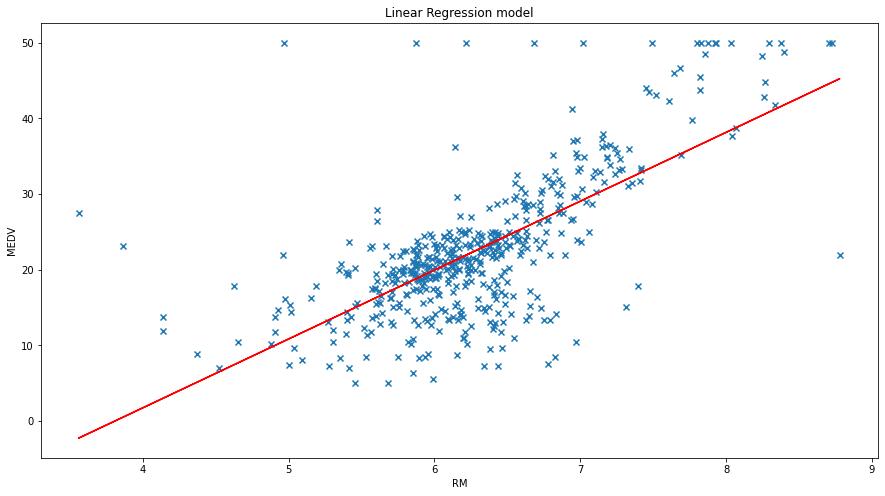

In [67]:
plt.figure(figsize = (15,8))
plt.scatter(boston[input_feature], boston[output_feature], marker='x')
plt.plot(X[:, 1], X.dot(theta_ne), c = 'r')
plt.title("Linear Regression model")
plt.xlabel(input_feature)
plt.ylabel(output_feature)
plt.show()

In [68]:
# > Funzione definita sulla distanza punto retta.
# > Interfaccia: m e q di una retta, un vettore di coordinate X e Y della stessa lunghezza
# > Restituisce un vettore di distanze.

def pointToLineDistance(m, q, Px, Py):
    
    if (Px.shape[0] != Py.shape[0]):
        print("X and Y must be of same dimension")
        return []
        
    distance=[]
    for i in range(Px.shape[0]):
        dis= (np.abs(Py[i] - (Px[i]*m + q)))/math.sqrt(1 + m**2)
        distance.append(dis)

    return distance

In [72]:
m = theta_ne[1]
q = theta_ne[0]

distance = pointToLineDistance(m, q, X[:,1], y)

In [74]:
#Creo un dataframe usando le distanze calcolate dalla funzione
distance_df = pd.DataFrame(distance, columns = ['PtLDistance'] )

#Eseguo il calcolo outlier usando Zscore sulle distanze
distance_in = distance_df[(np.abs(stats.zscore(distance_df)) < 3).all(axis=1)]
print("Number of inliers 'distance' samples with Z score: ", distance_in.shape[0])

distance_out = distance_df[~(np.abs(stats.zscore(distance_df)) < 3).all(axis=1)]
print("Number of outliers 'distance' samples with Z score: ", distance_out.shape[0])

#salvo per comodità gli indici trovati 
out_idx = distance_out.index
in_idx = distance_in.index

#Uso i vettori numpy calcolati prima per separare le X ed Y outliers da inliers usando gli indici
X_d_in = X[in_idx, 1]
X_d_out = X[out_idx, 1]
Y_d_in = y[in_idx]
Y_d_out = y[out_idx]

Number of inliers 'distance' samples with Z score:  497
Number of outliers 'distance' samples with Z score:  9


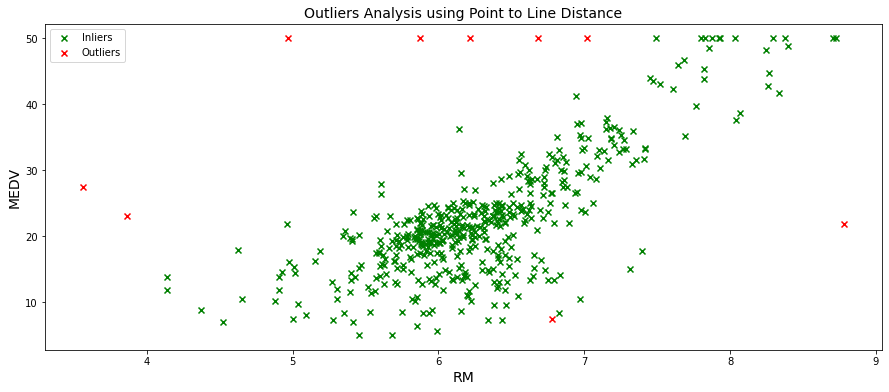

In [81]:
plt.figure(figsize =(15,6))
plt.scatter(X_d_in, Y_d_in, marker = 'x', c = 'g', label = "Inliers")
plt.scatter(X_d_out, Y_d_out, marker = 'x', c = 'r', label = "Outliers")
plt.title("Outliers Analysis using Point to Line Distance", fontsize = 14)
plt.xlabel(input_feature, fontsize = 14)
plt.ylabel(output_feature, fontsize = 14)
plt.legend()
plt.show()

# Mahalanobis Distance

# RANSAC